# Bootcamp 9:  Scipy curve_fit

When we want to fit a model to data, where the model is something more complex than a polynomial, we can use scipy's curve_fit(). Using curve_fit() allows us to use regression to fit a model we define to a dataset. The model we define can be linear, polynomial, trigonometric, exponential, and many more! The image below reviews the parts of curve_fit() call.

![curve_fit parts](https://github.com/msu-cmse-courses/cmse201-F21-data/blob/main/scipy_curve_fit_anatomy.png?raw=true)




## **Example**

The following image shows an example of using curve_fit(). You can follow this basic structure for any model you want to fit! In the example, we are fitting the model $y = A \ \rm{sin}(B \ x+C)$ to our data.

Once we have a best fit, we can plot our model with the best fit parameters with the data to visualize the fit. It's also helpful to see that the fit makes sense for the data. If the line is far from the data points, then you may have an incorrect model or a bug in your code!

![curve_fit example](https://github.com/msu-cmse-courses/cmse201-F21-data/blob/main/scipy_curve_fit_example.png?raw=true)

## Task 1: A Basic Example

In the cell below, fit a line ($y = \rm{m} \ x + b$) to the data provided using curve_fit(). You will need to write your own function for $y = \rm{m} \ x + b$. Report the best fit slope, m, and intercept, b. Plot the data and best fit line using matplotlib. Make sure to include the necessary labels on the plot.

In [54]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# data you will fit a line to

# x data (generated using a uniform array)
my_x_data = np.arange(0,25,0.5)
# y data (generated by multiplying x data by a slope and adding random numbers to simulate scatter)
my_y_data = 1.5 * my_x_data + np.random.normal(5,5,50)

In [56]:
# write your fitting function here

def linear(x, m, b):
    return (m*x)+b


the best slope would be 1.5043578780276292
the best y-intercept would be 3.3343677609857143


Text(0, 0.5, 'Y Data')

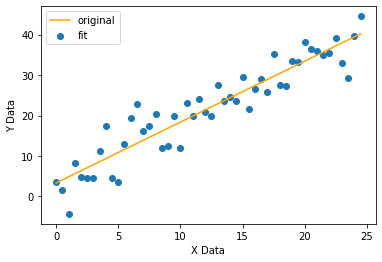

In [57]:
# write your curve_fit() code and plot here

params, cov = curve_fit(linear, my_x_data, my_y_data) 

m_estimate=params[0]
b_estimate=params[1]
print("the best slope would be", m_estimate)
print("the best y-intercept would be", b_estimate)
0
y_fit=linear(my_x_data, m_estimate, b_estimate)

plt.scatter(my_x_data, my_y_data)
plt.plot(my_x_data, y_fit, c='orange')
plt.legend(["original","fit"])
plt.xlabel("X Data")
plt.ylabel("Y Data")

## Task 2: Practice with RMSE

Below is the function for RMSE that we used in class on Day 12 (see that In Class assignment if you need a review) with a small change for ease of use. Recall that RMSE (Root Mean Squared Error) provides a measure of how accurate a fit is. The smaller your RMSE, the better the fit! 

You are also given a function for a polynomial and a function for a sine function as well as some generated x and y data to fit. 

Your task is to fit the data with both the polynomial and the sine function and then using the RMSE function, determine which is the better fit. Plot the data and both of your fits as well. 

In [30]:
# RMSE function (see In Class Day 12)
def rmse(x_points,y_points,y_pred):
    """
    A function for computing the RMSE of a model, based on a set of points.
    
    Input:
    x_points  : array
                A set of x points (e.g. times) that correspond to the data points, y

    y_points  : array
                A set of y points (e.g. transistor counts) that correspond to the times
                x
                
    y_pred    : array
                the array of predicted values for your model (same length as x_points and y_points)

                
                
    Output:
    rmse      : float
                The root mean squared error of the model, computed using x and y
    """
    
    nx = len(x_points)
    ny = len(y_points)
    
    if nx != ny:
        print("Error! x and y must have the same length!")
        
    sum_sq = 0
    for i in range(len(x_points)):
        sum_sq += (y_points[i] - y_red[i])**2

    rmse = np.sqrt(sum_sq/nx)
    
    return rmse

In [70]:
# polynomial function for fitting
def my_approximating_polynomial(x,A,B,C):
    return A*x-B*x**3+C*x**5

#sine function for fitting

def my_sine_function(x,A,B,C):
    import numpy as np
    return A*np.sin(B*x)+C

# x values
x_array = np.linspace(0,2*np.pi,100)
# y values generated by adding random scatter
y_data = np.sin(x_array) + np.random.normal(.5,.5,100)

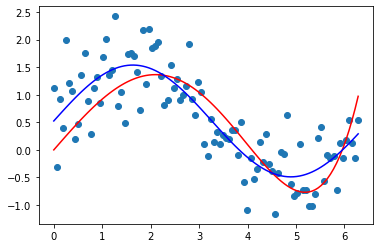

In [71]:
# your code here
poly_params, _ = curve_fit(my_approximating_polynomial,x_array, y_data)

A_expected=poly_params[0]
B_expected=poly_params[1]
C_expected=poly_params[2]


sin_params, cov = curve_fit(my_sine_function, x_array, y_data)

A_expected2=sin_params[0]
B_expected2=sin_params[1]
C_expected2=sin_params[2]

y_poly=my_approximating_polynomial(x_array, A_expected, B_expected, C_expected)
y_sin=my_sine_function(x_array, A_expected2, B_expected2, C_expected2)
plt.scatter(x_array, y_data)
plt.plot(x_array, y_poly, color='r')
plt.plot(x_array, y_sin, color='b')

## Task 3: Fitting with a more complicated curve

Below, you are given a dataset. You need to fit the data with the following function $y = Ae^{Bx}$ using curve_fit(). Plot your data and the best fit. For extra practice, calculate the RMSE!

Remember the steps for solving a curve_fit() problem. You will need to write your fitting function with the correct parameters, run your curve_fit() call, and then unpack your parameters for plotting!

In [61]:
x_data_exp = np.array([ 0.       ,   0.41666667,  0.83333333,  1.25  ,      1.66666667,  2.08333333,
  2.5,         2.91666667,  3.33333333,  3.75,        4.16666667, 4.58333333,
  5.,          5.41666667,  5.83333333,  6.25,        6.66666667,  7.08333333,
  7.5,         7.91666667,  8.33333333,  8.75,        9.16666667,  9.58333333,
 10.        ])

y_data_exp = np.array([-3.68337708e+00,  1.39658773e+01,  1.00650307e+01, -2.92657505e-02,
 -7.62920546e+00,  2.81191792e+01,  8.04337494e+00,  2.56305766e+01,
  3.87889679e+01,  2.14103845e+01,  1.88004008e+01,  3.01680011e+01,
  3.60940131e+01,  3.57200248e+01,  5.02427770e+01,  4.23525345e+01,
  5.37357199e+01,  4.29363738e+01,  7.97825245e+01,  7.01883073e+01,
  1.10187785e+02,  1.32723668e+02,  1.58002488e+02,  1.73352344e+02,
  2.27538706e+02])
print(len(x_data_exp),len(y_data_exp))
#print(x_data)
#print(y_test)

25 25


In [62]:
# your code here

def exp(x_data_exp, A, B):
    return A*np.exp(B*x_data_exp)


Text(0, 0.5, 'Y Data')

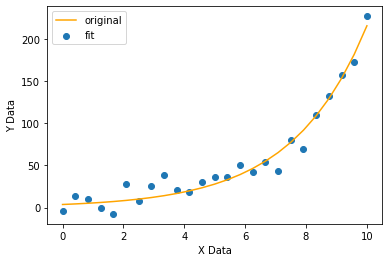

In [63]:
params, cov = curve_fit(exp, x_data_exp, y_data_exp) 

A_estimate=params[0]
B_estimate=params[1]


y_fit=exp(x_data_exp, A_estimate, B_estimate)

plt.scatter(x_data_exp, y_data_exp)
plt.plot(x_data_exp, y_fit, c='orange')
plt.legend(["original","fit"])
plt.xlabel("X Data")
plt.ylabel("Y Data")